# Data Analysis

### Data base: Avocado.

#### Main Goal: Modelling the data to preview Avocado Prices based on the features the DB gives us.

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
direc = os.getcwd()
print(direc)

C:\Users\u122097\Documents


In [8]:
#change directory
os.chdir('C://Users//u122097//Documents')

In [58]:
df = pd.read_csv('avocado.csv', sep =',')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [36]:
df = df.drop(['Unnamed: 0'], axis =1)

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.shape

(18249, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.count()

Unnamed: 0      18249
Date            18249
AveragePrice    18249
Total Volume    18249
4046            18249
4225            18249
4770            18249
Total Bags      18249
Small Bags      18249
Large Bags      18249
XLarge Bags     18249
type            18249
year            18249
region          18249
dtype: int64

# Análise Exploratória

In [8]:
for col in df.columns:
    print(col)
    print('O número de NAs na V.A:',sum(df[col].isna()))

Unnamed: 0
O número de NAs na V.A: 0
Date
O número de NAs na V.A: 0
AveragePrice
O número de NAs na V.A: 0
Total Volume
O número de NAs na V.A: 0
4046
O número de NAs na V.A: 0
4225
O número de NAs na V.A: 0
4770
O número de NAs na V.A: 0
Total Bags
O número de NAs na V.A: 0
Small Bags
O número de NAs na V.A: 0
Large Bags
O número de NAs na V.A: 0
XLarge Bags
O número de NAs na V.A: 0
type
O número de NAs na V.A: 0
year
O número de NAs na V.A: 0
region
O número de NAs na V.A: 0


In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
list(df)

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [11]:
def FeatureDistribution (df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 0]]
    nRow, nCol = df.shape
    columnNames =  list(df)
    nGraphRow = int(round(((nCol + nGraphPerRow -1)/ nGraphPerRow),0))
    plt.figure(figsize = (6* nGraphPerRow, 9*nGraphRow), facecolor ='w', edgecolor ='k')
    for i in range(min(nCol,nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDF = df.iloc[:, i]
        if (not np.issubdtype(type(columnDF.iloc[0]), np.number)):
            valueCounts = columnDF.value_counts()
            valueCounts.plot.bar()
        else:
            values, bins, bars = plt.hist(columnDF)
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
        plt.bar_label(bars, fontsize=10, color='navy')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [12]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for', fontsize=15)
    plt.show()

In [13]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

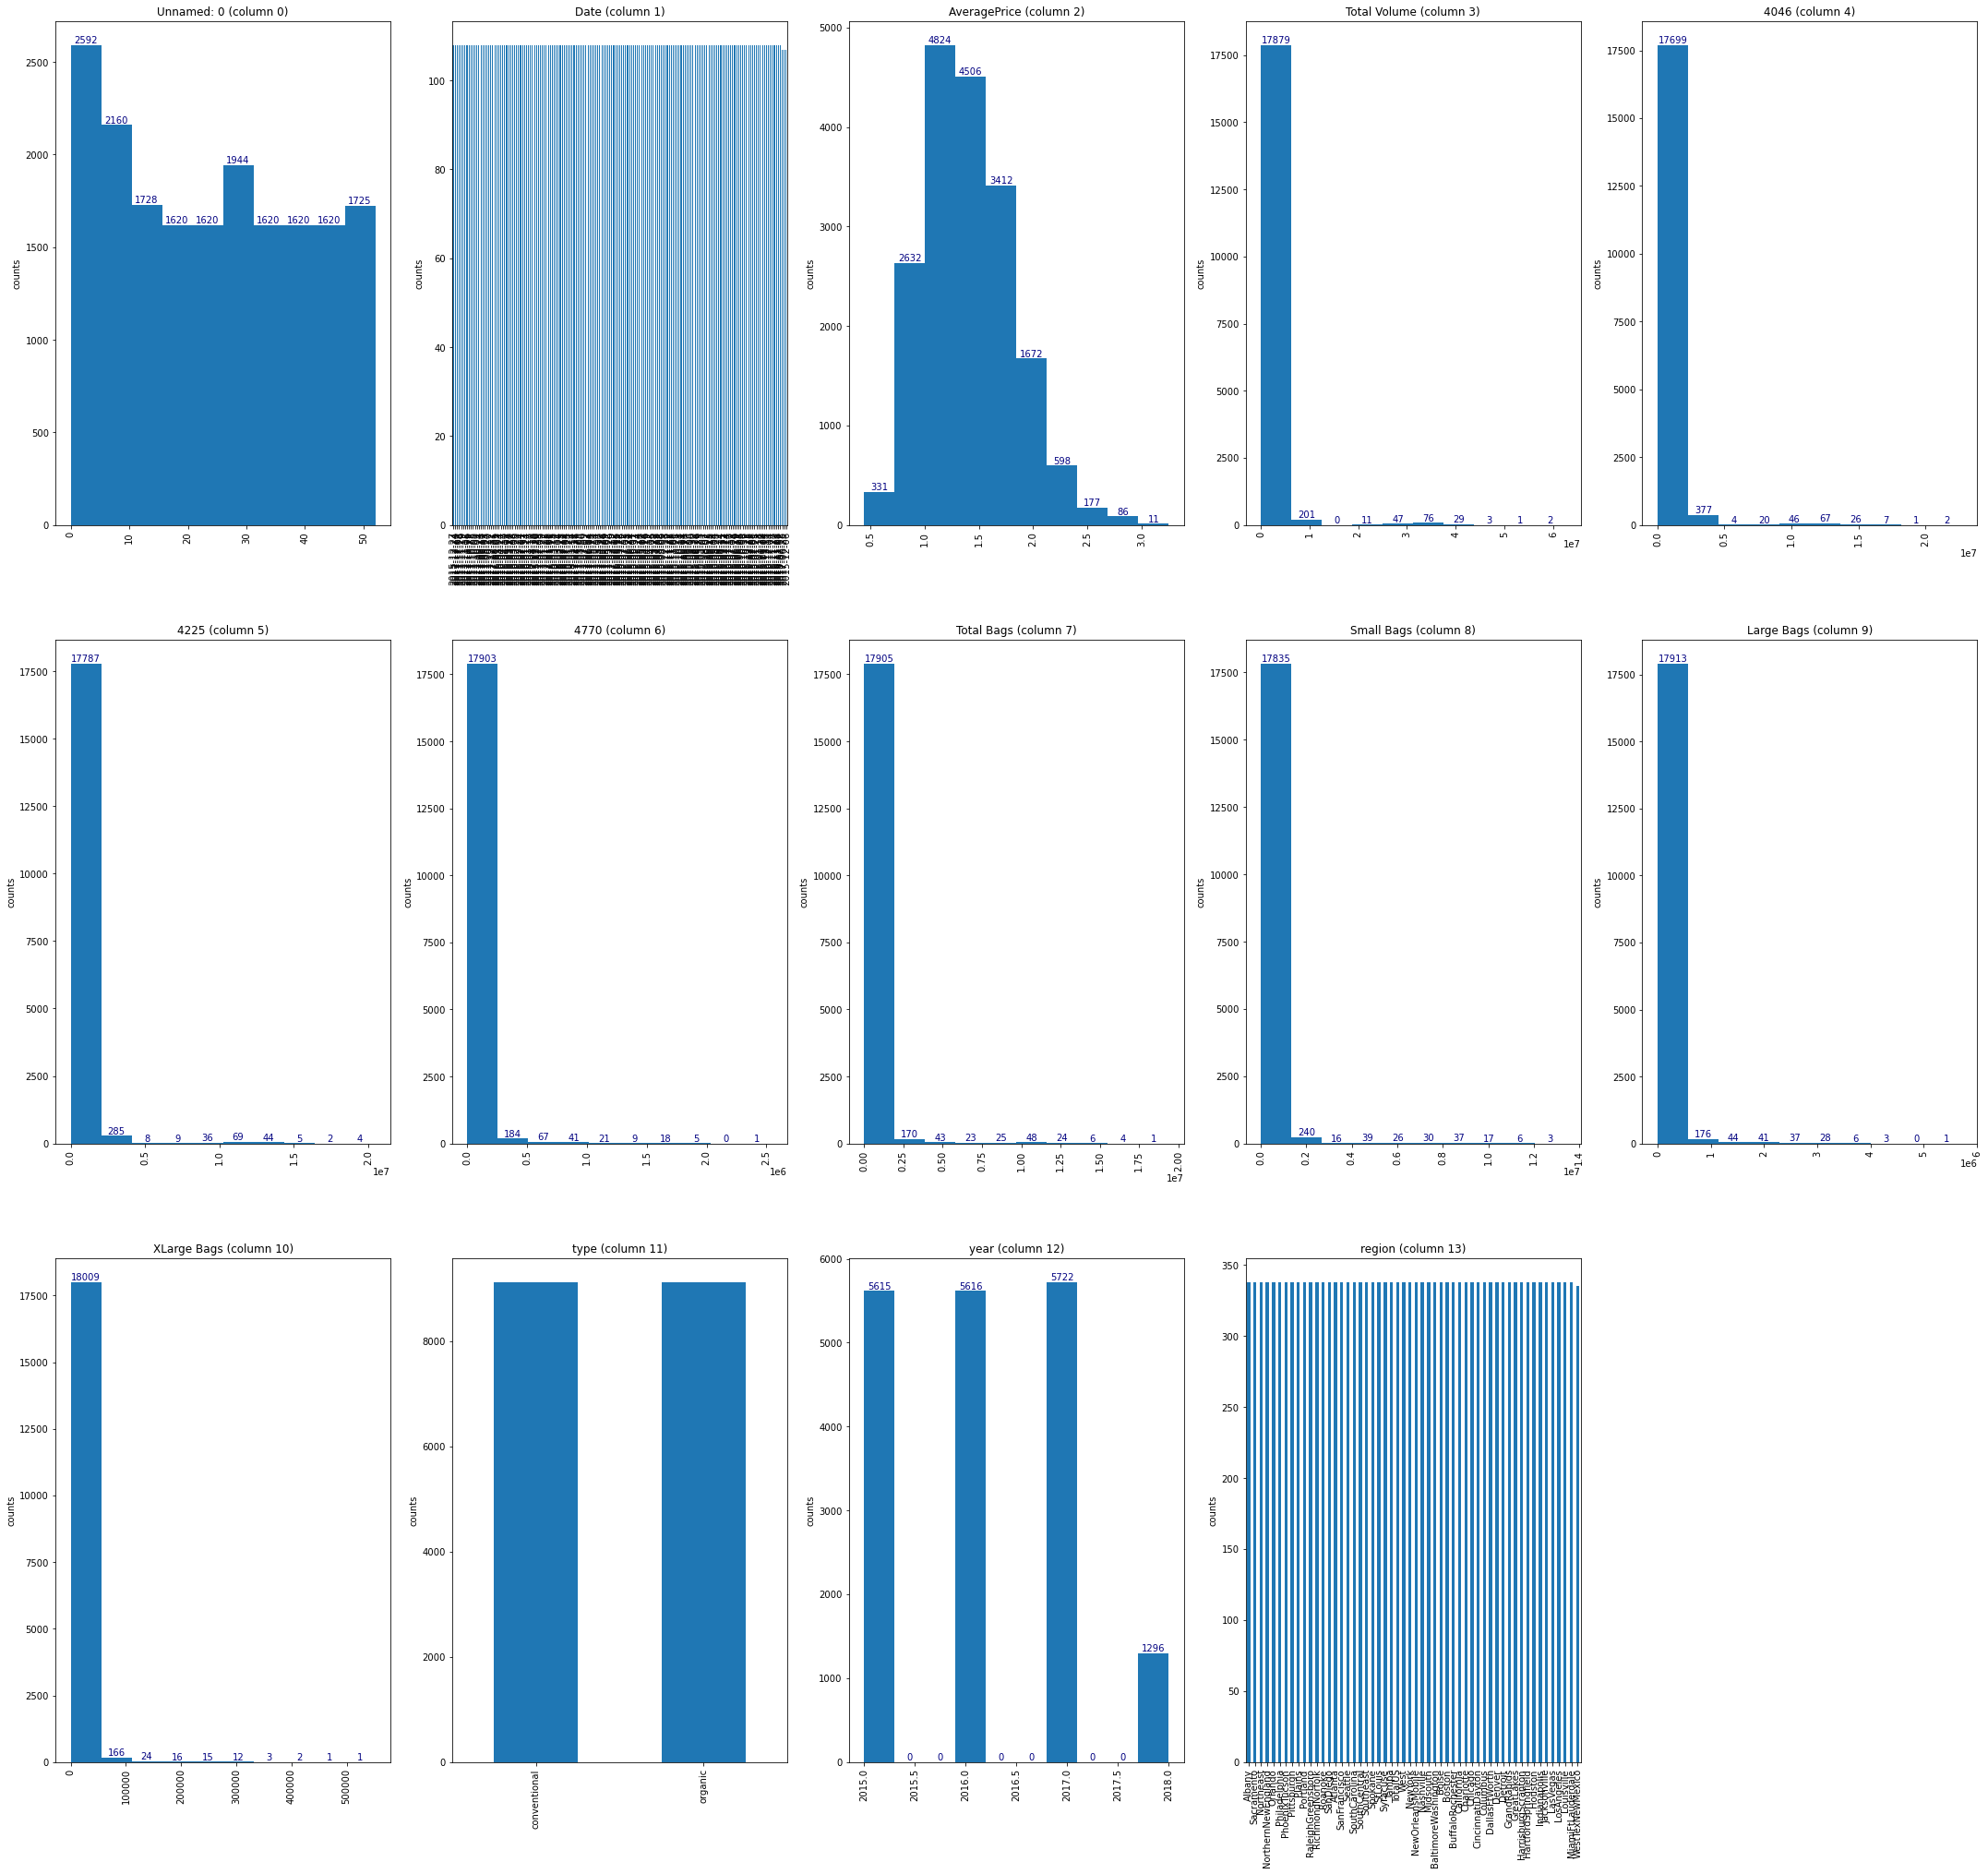

In [135]:
FeatureDistribution(df,14,5)

C:\Users\vinic\AppData\Local\Temp/ipykernel_10920/642552214.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


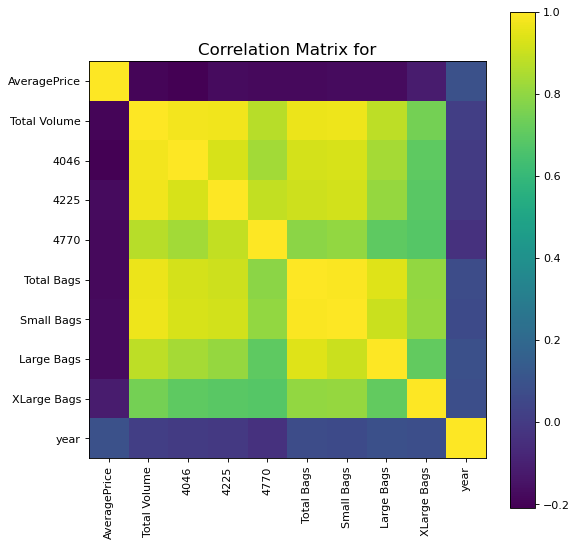

In [44]:
plotCorrelationMatrix(df, 8)

C:\Users\vinic\AppData\Local\Temp/ipykernel_10920/3630813423.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


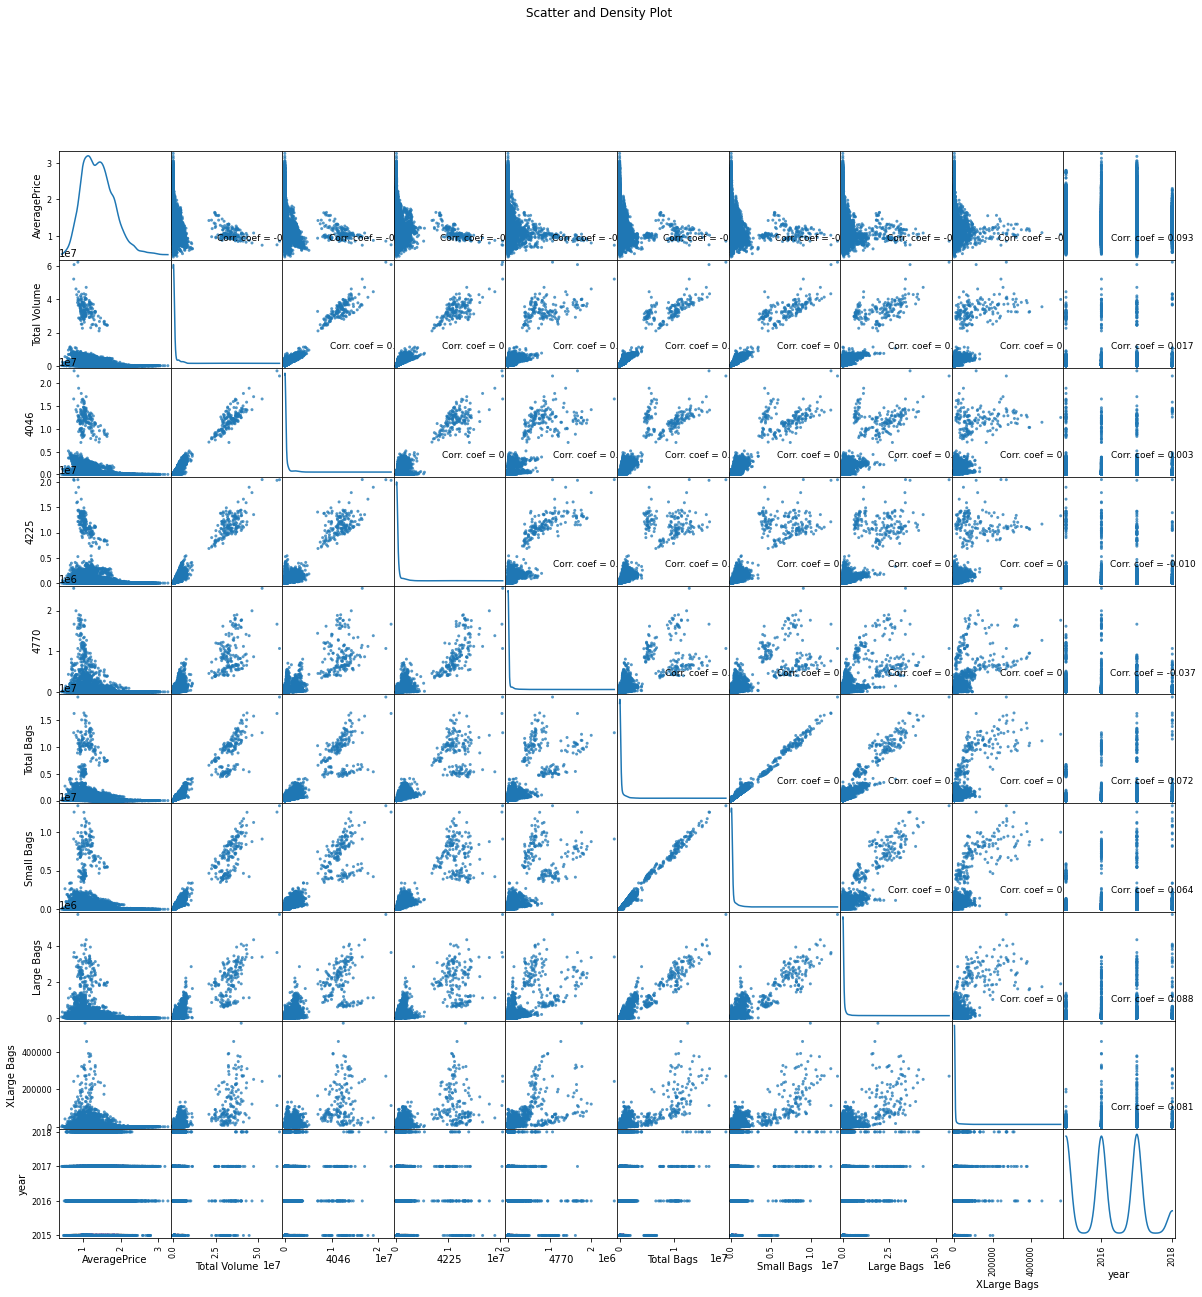

In [45]:
plotScatterMatrix(df,20,9)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Value'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    
    return(vif)

In [15]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [38]:
df_VIF = df.drop(['region','type','Date'], axis =1)

In [39]:
features = df_VIF.iloc[:,:-1]
calculate_vif(features)

,features,VIF_Value
0,AveragePrice,1.040876e+00
1,Total Volume,5.204434e+09
2,4046,6.936343e+08
3,4225,6.323260e+08
4,4770,4.965750e+06
5,Total Bags,2.502000e+14
6,Small Bags,1.429714e+14
7,Large Bags,1.521486e+13
8,XLarge Bags,7.854819e+10


In [40]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [23]:
df['AveragePrice'].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1932dba96a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1932dba9dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1932dba9310>],
 'medians': [<matplotlib.lines.Line2D at 0x1932dbb7520>],
 'fliers': [<matplotlib.lines.Line2D at 0x1932dbb78b0>],
 'means': []}

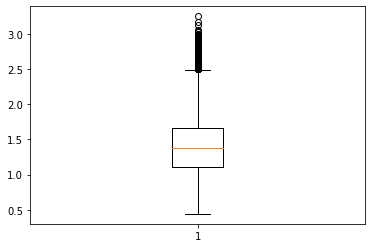

In [41]:
plt.boxplot(df['AveragePrice'])

In [42]:
corr = df.corr(method = 'pearson')
corr.style.background_gradient(cmap='coolwarm')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


In [43]:
corr = df.corr(method = 'spearman')
corr.style.background_gradient(cmap='coolwarm')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.612239,-0.596170,-0.513732,-0.532825,-0.596972,-0.536403,-0.511142,-0.427207,0.102275
Total Volume,-0.612239,1.000000,0.902887,0.940025,0.828223,0.952550,0.925874,0.702067,0.659949,0.085144
4046,-0.596170,0.902887,1.000000,0.793939,0.754838,0.837121,0.822036,0.638535,0.615535,0.009844
4225,-0.513732,0.940025,0.793939,1.000000,0.819905,0.856946,0.833764,0.635465,0.628893,0.006217
4770,-0.532825,0.828223,0.754838,0.819905,1.000000,0.779323,0.780185,0.571869,0.652807,-0.043871
Total Bags,-0.596972,0.952550,0.837121,0.856946,0.779323,1.000000,0.961018,0.753044,0.652582,0.207269
Small Bags,-0.536403,0.925874,0.822036,0.833764,0.780185,0.961018,1.000000,0.603582,0.641796,0.183499
Large Bags,-0.511142,0.702067,0.638535,0.635465,0.571869,0.753044,0.603582,1.000000,0.500590,0.191056
XLarge Bags,-0.427207,0.659949,0.615535,0.628893,0.652807,0.652582,0.641796,0.500590,1.000000,0.166582
year,0.102275,0.085144,0.009844,0.006217,-0.043871,0.207269,0.183499,0.191056,0.166582,1.000000


In [55]:
len(df['region'].unique())

54